In [1]:
!pip install selenium

### 1. Taking an input from user

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
from selenium.common.exceptions import NoSuchElementException



In [9]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [10]:
driver.get("https://www.amazon.in/")

In [11]:
u=input("Enter a product:")
product=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
product.send_keys(u)

Enter a product:tabla


In [12]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div')
search.click()

### 2. Scraping all it's details on first 3 search pages

In [13]:
url=[]
start=0
end=3
for page in range (start,end):
    for i in driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]'):
        url.append(i.get_attribute('href'))
next_button=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
next_button.click()
url

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyODkxNjQ4NzI4MDY4MjczOjE2Nzc5MTM4OTI6c3BfYXRmOjIwMDUyNzA5MjExNjk4OjowOjo&url=%2FSangat-Electronic-Instrument-Classical-Percussion%2Fdp%2FB0B34T955G%2Fref%3Dsr_1_1_sspa%3Fcrid%3D2UKI2IMCJK24U%26keywords%3Dtabla%26qid%3D1677913892%26sprefix%3Dtabla%252Caps%252C515%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1%26smid%3DA2NH0O0UQ00X42',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyODkxNjQ4NzI4MDY4MjczOjE2Nzc5MTM4OTI6c3BfYXRmOjIwMTI2MDk4NDA0Nzk4OjowOjo&url=%2FSURJAN-SINGH-SONS-Steel-accessories%2Fdp%2FB08V9DCK3F%2Fref%3Dsr_1_2_sspa%3Fcrid%3D2UKI2IMCJK24U%26keywords%3Dtabla%26qid%3D1677913892%26sprefix%3Dtabla%252Caps%252C515%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyODkxNjQ4NzI4MDY4MjczOjE2Nzc5MTM4OTI6c3BfYXRmOjIwMTI2MDk4NDA1Mjk4OjowOjo&url=%2FSurjan-Singh-Sons-Iron-Tabla%2Fdp%2FB01F2413UE%2Fref%3Dsr_1_3_sspa%3Fcrid%3D2UKI2IMCJK24U%26keywords%3Dtab

In [14]:
len(url)

189

In [165]:
brand_name=[]
product_name=[]
price=[]
exchange_return=[]
delivery_time=[]
availability=[]
for i in url:
    driver.get(i)
    time.sleep(5)
    try:
        b=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[41]/div/table/tbody/tr[1]/td[2]/span')
        brand_name.append(b.text)
        p=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[1]/div/h1/span')
        product_name.append(p.text)
        pr=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[9]/div[3]/div[1]/span[2]/span[2]/span[2]')
        price.append(pr.text)
        ex=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[21]/div[2]/div/div/div/div[2]/div/ol/li[3]/div/span/div[2]/a')
        exchange_return.append(ex.text)
        d=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[2]/div[9]/div[1]/div/div/div[1]/span/span')
        delivery_time.append(d.text)
        a=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[4]/div/div[1]/span')
        availability.append(a.text)
    except NoSuchElementException:
        brand_name.append("-")
        product_name.append("-")
        price.append("-")
        exchange_return.append("-")
        delivery_time.append("-")
        availability.append("-")

     

Exception ignored in: <function Service.__del__ at 0x000001C3C9A6A4C0>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 183, in __del__
    self.stop()
  File "C:\Users\HP\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 149, in stop
    self.send_remote_shutdown_command()
  File "C:\Users\HP\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 133, in send_remote_shutdown_command
    if not self.is_connectable():
  File "C:\Users\HP\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 122, in is_connectable
    return utils.is_connectable(self.port)
  File "C:\Users\HP\anaconda3\lib\site-packages\selenium\webdriver\common\utils.py", line 102, in is_connectable
    socket_ = socket.create_connection((host, port), 1)
  File "C:\Users\HP\anaconda3\lib\socket.py", line 832, in create_connection
    sock.connect(sa)
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
brand_name=brand_name[0:40]
brand_name

In [ ]:
product_name=product_name[0:220]
product_name

In [41]:
price=price[0:220]
price

['999',
 '899',
 '899',
 '849',
 '785',
 '549',
 '399',
 '769',
 '720',
 '769',
 '-',
 '965',
 '599',
 '-',
 '-',
 '849',
 '849',
 '879',
 '-',
 '720',
 '965',
 '785',
 '-',
 '879',
 '-',
 '580',
 '849',
 '879',
 '589',
 '-',
 '-',
 '1,078',
 '745',
 '989',
 '890',
 '179',
 '449',
 '-',
 '449',
 '-',
 '449',
 '-',
 '1,099',
 '949',
 '742',
 '1,090',
 '769',
 '1,356',
 '594',
 '-',
 '633',
 '895',
 '745',
 '845',
 '898',
 '1,185',
 '599',
 '-',
 '599',
 '-',
 '449',
 '-',
 '1,114',
 '-',
 '599',
 '749',
 '-',
 '580',
 '949',
 '592',
 '-',
 '592',
 '-',
 '592',
 '-',
 '590',
 '-',
 '580',
 '843',
 '-',
 '843',
 '-',
 '843',
 '-',
 '599',
 '-',
 '625',
 '-',
 '899',
 '845',
 '932',
 '649',
 '-',
 '849',
 '999',
 '899',
 '-',
 '849',
 '785',
 '549',
 '399',
 '769',
 '720',
 '769',
 '580',
 '-',
 '599',
 '-',
 '599',
 '-',
 '849',
 '849',
 '879',
 '-',
 '-',
 '965',
 '785',
 '-',
 '879',
 '-',
 '580',
 '849',
 '879',
 '589',
 '-',
 '-',
 '1,078',
 '745',
 '989',
 '-',
 '179',
 '449',
 '-',


In [42]:
exchange_return=exchange_return[0:220]
exchange_return

['10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '-',
 '10 days Returnable',
 '-',
 '-',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '-',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '-',
 '10 days Returnable',
 '-',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '-',
 '-',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '-',
 '-',
 '-',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '-',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '10 days Returnable',
 '-',
 '10 days Returnable',
 '-',
 '10 days Returnabl

In [43]:
delivery_time=delivery_time[0:220]
delivery_time

['Tuesday, 28 February',
 'Tuesday, 28 February',
 'Tuesday, 28 February',
 'Tuesday, 28 February',
 'Sunday, 26 February',
 'Sunday, 26 February',
 'Sunday, 26 February',
 'Tuesday, 28 February',
 'Tuesday, 28 February',
 'Tuesday, 28 February',
 '-',
 'Sunday, 26 February',
 '-',
 '-',
 'Tuesday, 28 February',
 'Tuesday, 28 February',
 'Tuesday, 28 February',
 '-',
 'Monday, 27 February',
 'Sunday, 26 February',
 'Sunday, 26 February',
 '-',
 'Sunday, 26 February',
 '-',
 'Monday, 27 February',
 'Tuesday, 28 February',
 'Sunday, 26 February',
 '-',
 '-',
 'Sunday, 26 February',
 'Monday, 27 February',
 'Tuesday, 28 February',
 'Monday, 27 February',
 'Sunday, 26 February',
 '-',
 '-',
 '-',
 'Tuesday, 28 February',
 'Tuesday, 28 February',
 'Tuesday, 28 February',
 'Monday, 27 February',
 'Tuesday, 28 February',
 'Monday, 27 February',
 '-',
 'Wednesday, 1 March',
 'Sunday, 26 February',
 'Monday, 27 February',
 'Monday, 27 February',
 'Tuesday, 28 February',
 'Sunday, 26 February',


In [44]:
availability=availability[0:220]
availability

['In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 '-',
 'In stock',
 '-',
 '-',
 'In stock',
 'In stock',
 'In stock',
 '-',
 'In stock',
 'In stock',
 'In stock',
 '-',
 'In stock',
 '-',
 'In stock',
 'In stock',
 'In stock',
 '-',
 '-',
 'In stock',
 'In stock',
 'Only 2 left in stock',
 'In stock',
 'In stock',
 '-',
 '-',
 '-',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 '-',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 '-',
 'In stock',
 '-',
 'In stock',
 '-',
 '-',
 'In stock',
 '-',
 'In stock',
 'In stock',
 '-',
 '-',
 '-',
 '-',
 'In stock',
 '-',
 '-',
 '-',
 '-',
 'In stock',
 '-',
 'In stock',
 'In stock',
 'In stock',
 '-',
 'In stock',
 'In stock',
 'In stock',
 '-',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 '-',
 '-',
 '-',
 'In stock',
 'In stock',
 'In stoc

In [45]:
print(len(brand_name),len(product_name),len(price),len(exchange_return),len(delivery_time),len(availability))

220 220 220 220 220 220


In [46]:
df1=pd.DataFrame({"Brand":brand_name,"Product":product_name,"Price":price,"Exchange/Return":exchange_return,"Expected Delivery":delivery_time,"Availability":availability})
df1

,Brand,Product,Price,Exchange/Return,Expected Delivery,Availability
0,USHA SHRIRAM,USHA SHRIRAM Pure Copper Water Bottle 1 Litre ...,999,10 days Returnable,"Tuesday, 28 February",In stock
1,The Better Home,The Better Home Copper Water Bottle 1 Litre | ...,899,10 days Returnable,"Tuesday, 28 February",In stock
2,The Better Home,The Better Home 1000 Copper Water Bottle (900m...,899,10 days Returnable,"Tuesday, 28 February",In stock
3,EB-Everything Beautiful,EB-Everything Beautiful Classic Pure Copper Wa...,849,10 days Returnable,"Tuesday, 28 February",In stock
4,MILTON,"MILTON Copper Charge 1000 Water Bottle, 930 ml...",785,10 days Returnable,"Sunday, 26 February",In stock
...,...,...,...,...,...,...
215,TAGOTT,"TAGOTT Apsara Copper Water Bottle, 1000ml, Set...",879,-,-,-
216,VEDIK,VEDIK Sparsh Copper Water Bottle 1 Liter Leak ...,589,10 days Returnable,"Monday, 27 February",In stock
217,-,-,-,10 days Returnable,-,-
218,-,-,-,-,-,-


In [47]:
csv_data=df1.to_csv()
print("CSV String:\n",csv_data)

CSV String:
 ,Brand,Product,Price,Exchange/Return,Expected Delivery,Availability
0,USHA SHRIRAM,"USHA SHRIRAM Pure Copper Water Bottle 1 Litre | Eco-Friendly, Biodegradable & Non-Toxic | Water Bottle for Kids & Adults | Lightweight, Leak-Proof, Durable & Rust-Free Tamba Bottle",999,10 days Returnable,"Tuesday, 28 February",In stock
1,The Better Home,The Better Home Copper Water Bottle 1 Litre | 100% Pure Copper Bottle | BPA Free Water Bottle with Anti Oxidant Properties of Copper Pack Of 1,899,10 days Returnable,"Tuesday, 28 February",In stock
2,The Better Home,The Better Home 1000 Copper Water Bottle (900ml) | 100% Pure Copper Bottle | BPA Free & Non Toxic Water Bottle with Anti Oxidant Properties of Copper | Blue (Pack of 1),899,10 days Returnable,"Tuesday, 28 February",In stock
3,EB-Everything Beautiful,EB-Everything Beautiful Classic Pure Copper Water Bottle 1 Litre Leakproof in Standard Shape with Ayurvedic Benefits made of Tamba Birthday Gift for Men & Women by ebstore,849,10 day

# 3. Scraping image urls from google

In [2]:
driver=webdriver.Chrome(r"chromedriver.exe")
driver.get("https://images.google.com/")

In [76]:
search1=driver.find_element(By.CLASS_NAME,'gLFyf')
search1.send_keys('fruits')



In [79]:
find=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
find.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
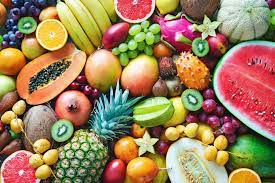
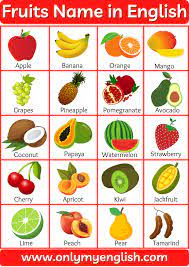
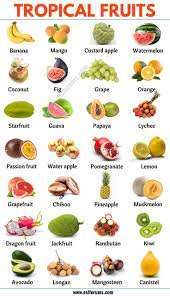
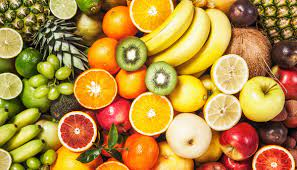
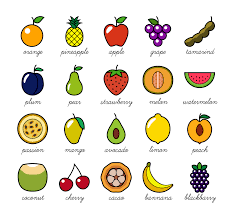
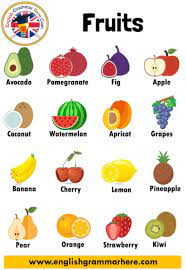
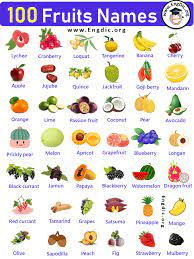
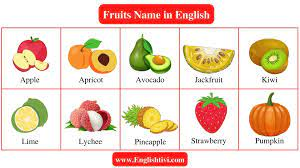
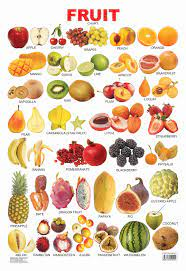
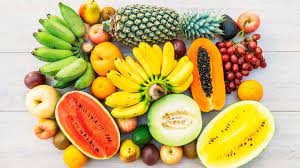

In [81]:
fruit_url=[]
for i in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
    fruit_url.append(i.get_attribute('src'))
fruit_url=fruit_url[0:10]
fruit_url

In [82]:
driver=webdriver.Chrome(r"chromedriver.exe")
driver.get("https://images.google.com/")

In [83]:
search1=driver.find_element(By.CLASS_NAME,'gLFyf')
search1.send_keys('cars')

In [85]:
find=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
find.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
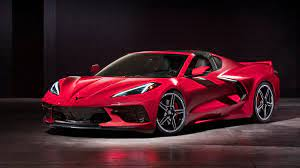
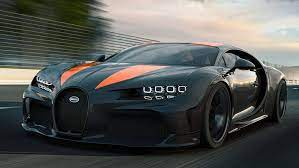
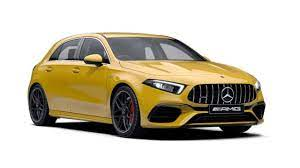
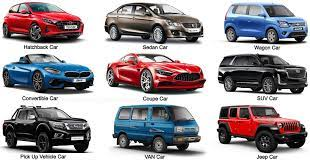
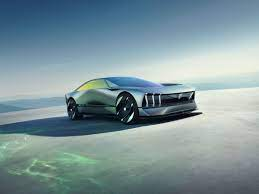
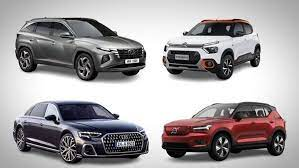
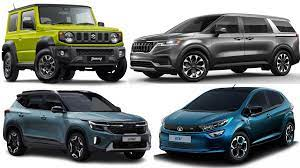
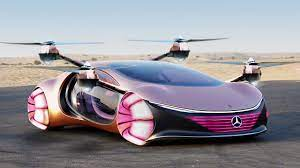
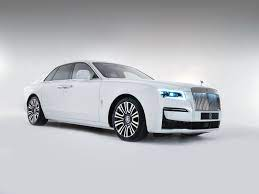
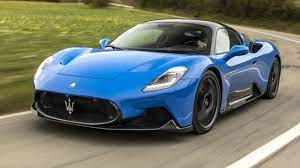

In [86]:
car_url=[]
for i in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
    car_url.append(i.get_attribute('src'))
car_url=car_url[0:10]
car_url

In [91]:
driver=webdriver.Chrome(r"chromedriver.exe")
driver.get("https://images.google.com/")

In [92]:
search1=driver.find_element(By.CLASS_NAME,'gLFyf')
search1.send_keys('machine learning')

In [94]:
find=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
find.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
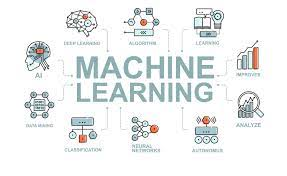
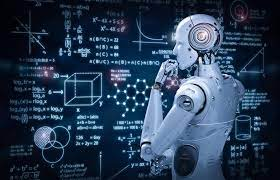
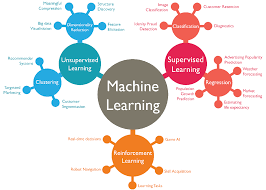
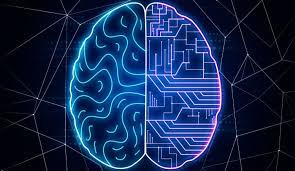
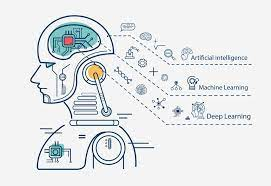
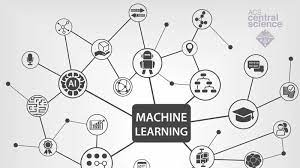
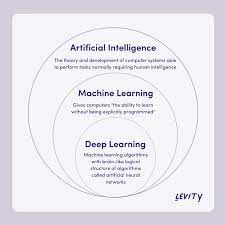
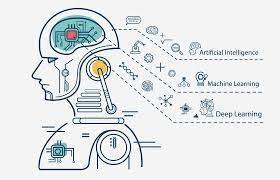
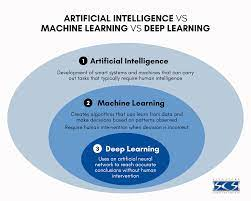
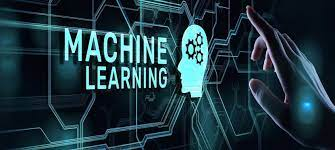

In [95]:
machine_url=[]
for i in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
    machine_url.append(i.get_attribute('src'))
machine_url=machine_url[0:10]
machine_url

In [96]:
driver=webdriver.Chrome(r"chromedriver.exe")
driver.get("https://images.google.com/")

In [97]:
search1=driver.find_element(By.CLASS_NAME,'gLFyf')
search1.send_keys('guitar')

In [98]:
find=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
find.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
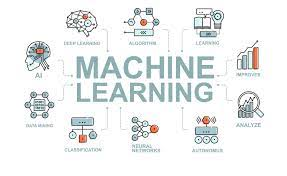
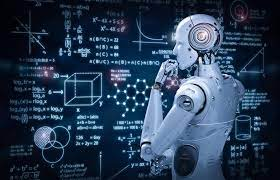
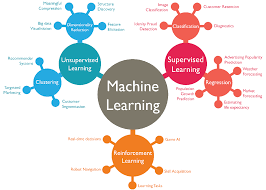
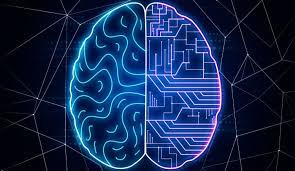
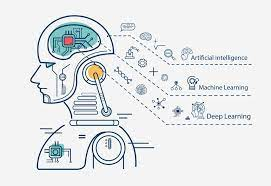
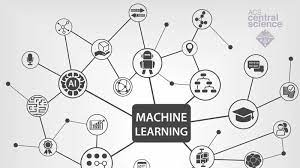
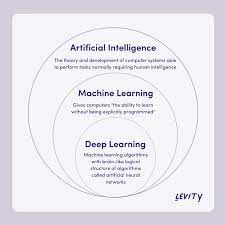
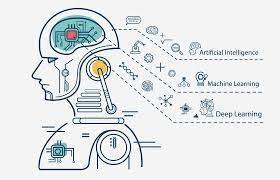
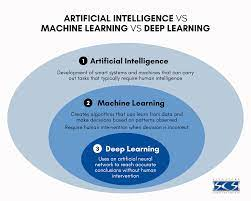
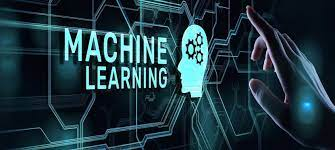

In [99]:
guitar_url=[]
for i in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
    guitar_url.append(i.get_attribute('src'))
guitar_url=machine_url[0:10]
guitar_url

In [100]:
driver=webdriver.Chrome(r"chromedriver.exe")
driver.get("https://images.google.com/")

In [101]:
search1=driver.find_element(By.CLASS_NAME,'gLFyf')
search1.send_keys('cakes')

In [102]:
find=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
find.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
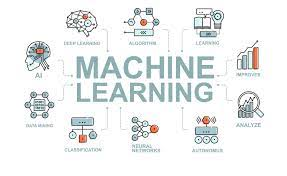
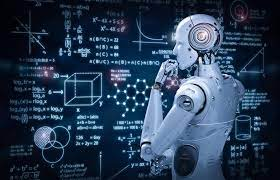
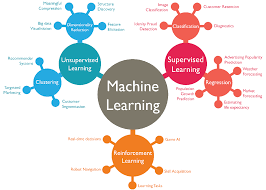
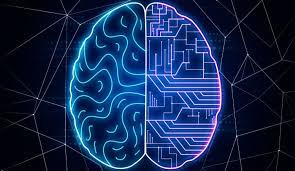
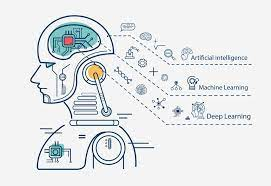
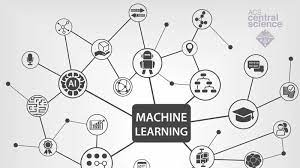
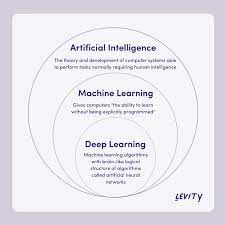
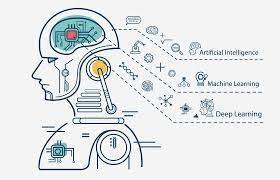
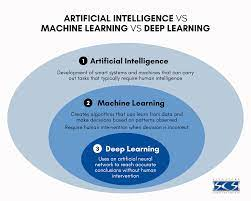
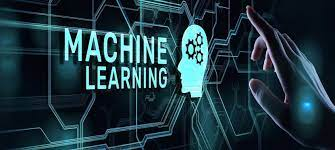

In [103]:
cake_url=[]
for i in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
    cake_url.append(i.get_attribute('src'))
cake_url=machine_url[0:10]
cake_url

In [135]:
driver=webdriver.Chrome(r"chromedriver.exe")
driver.get("https://images.google.com/")
driver.maximize_window()

In [137]:
fruits=[]
cars=[]
machine_learning=[]
guitar=[]
cakes=[]
keywords=['fruits','cars','machine learning','guitar','cakes']
for i in keywords:
    input_=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
    input_.send_keys(str(i))
    search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
    search.click()
    for a in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
        fruits.append(a.get_attribute('src'))
        cars.append(a.get_attribute('src'))
        machine_learning.append(a.get_attribute('src'))
        guitar.append(a.get_attribute('src'))
        cakes.append(a.get_attribute('src'))
     
    time.sleep(4)

fruits[0:10]


ElementClickInterceptedException: Message: element click intercepted: Element <span class="z1asCe MZy1Rb">...</span> is not clickable at point (753, 248). Other element would receive the click: <iframe role="presentation" frameborder="0" scrolling="no" name="callout" src="https://ogs.google.com/widget/callout?prid=19028915&amp;pgid=19027681&amp;puid=3e9e72cbc9a83b93&amp;cce=1&amp;dc=1&amp;origin=https%3A%2F%2Fimages.google.com&amp;cn=callout&amp;pid=1&amp;spid=2&amp;hl=en" style="height: 100%; width: 100%;" data-iml="1677571399684"></iframe>
  (Session info: chrome=110.0.5481.105)
Stacktrace:
Backtrace:
	(No symbol) [0x003537D3]
	(No symbol) [0x002E8B81]
	(No symbol) [0x001EB36D]
	(No symbol) [0x00224E3B]
	(No symbol) [0x002226DB]
	(No symbol) [0x0021FD0B]
	(No symbol) [0x0021E4D8]
	(No symbol) [0x00213253]
	(No symbol) [0x0023B41C]
	(No symbol) [0x00212B96]
	(No symbol) [0x0023B774]
	(No symbol) [0x00251215]
	(No symbol) [0x0023B216]
	(No symbol) [0x00210D97]
	(No symbol) [0x0021253D]
	GetHandleVerifier [0x005CABF2+2510930]
	GetHandleVerifier [0x005F8EC1+2700065]
	GetHandleVerifier [0x005FC86C+2714828]
	GetHandleVerifier [0x00403480+645344]
	(No symbol) [0x002F0FD2]
	(No symbol) [0x002F6C68]
	(No symbol) [0x002F6D4B]
	(No symbol) [0x00300D6B]
	BaseThreadInitThunk [0x76F16BD9+25]
	RtlGetFullPathName_UEx [0x77A28FD2+1218]
	RtlGetFullPathName_UEx [0x77A28F9D+1165]


### 4. Scraping smartphone details from Flipkart

In [52]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.get("https://www.flipkart.com/")
driver.maximize_window()

In [53]:
product=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
product.send_keys('Oneplus Nord')

In [54]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
search.click()

In [55]:
url=[]
for i in driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]'):
    url.append(i.get_attribute('href'))
url

['https://www.flipkart.com/oneplus-nord-ce-2-lite-5g-black-dusk-128-gb/p/itm7acae55b999e6?pid=MOBGMFRE7MMCSFPA&lid=LSTMOBGMFRE7MMCSFPAHLTR1C&marketplace=FLIPKART&q=Oneplus+Nord&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=2f31599a-ad5d-4052-8df3-326a47590e2b.MOBGMFRE7MMCSFPA.SEARCH&ppt=hp&ppn=homepage&ssid=7qnmutgb400000001677688730975&qH=53863d4d978d5074',
 'https://www.flipkart.com/oneplus-nord-ce-2-lite-5g-blue-tide-128-gb/p/itmb0f72d6334a47?pid=MOBGHBZHPYDVQ9FS&lid=LSTMOBGHBZHPYDVQ9FSCSPKHA&marketplace=FLIPKART&q=Oneplus+Nord&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=2f31599a-ad5d-4052-8df3-326a47590e2b.MOBGHBZHPYDVQ9FS.SEARCH&ppt=hp&ppn=homepage&ssid=7qnmutgb400000001677688730975&qH=53863d4d978d5074',
 'https://www.flipkart.com/oneplus-nord-ce-2-lite-5g-black-dusk-128-gb/p/itm537fc2aa73747?pid=MOBGHBZHB7YJT5HF&lid=LSTMOBGHBZHB7YJT5HFRDCRQX&marketplace=FLIPKART&q=Oneplus+Nord&store=tyy%2F4io&srno=s_1_3&otracker=search&o

In [56]:
len(url)

24

In [84]:
brand=[]
product_name=[]
colour=[]
RAM=[]
ROM=[]
primary_camera=[]
secondary_camera=[]
display=[]
battery=[]
price=[]
for i in url:
    driver.get(i)
    time.sleep(4)
    try:
        b=driver.find_element(By.XPATH,'//span[@class="B_NuCI"]')
        brand.append(b.text.split("Nord")[0])
        p=driver.find_element(By.XPATH,'//div[@class="_3k-BhJ"][1]/table/tbody/tr[3]/td[2]/ul/li')
        product_name.append(p.text.split("(")[0])
        c=driver.find_element(By.XPATH,'//div[@class="_3k-BhJ"][1]/table/tbody/tr[4]/td[2]/ul/li')
        colour.append(c.text)
        ram=driver.find_element(By.XPATH,'//li[@class="_21Ahn-"]')
        RAM.append(ram.text.split('|')[0])
        rom=driver.find_element(By.XPATH,'//li[@class="_21Ahn-"]')
        ROM.append(rom.text.split("|")[1])
        pc=driver.find_element(By.XPATH,'//div[@class="_2cM9lP"]/div/ul/li[3]')
        primary_camera.append(pc.text)
        secondary_camera.append("-")
        dis=driver.find_element(By.XPATH,'//div[@class="_2cM9lP"]/div/ul/li[2]')
        display.append(dis.text)
        bat=driver.find_element(By.XPATH,'//div[@class="_2cM9lP"]/div/ul/li[4]')
        battery.append(bat.text)
        pri=driver.find_element(By.XPATH,'//div[@class="_30jeq3 _16Jk6d"]')
        price.append(pri.text)
        time.sleep(5)
    except NoSuchElementException:
        brand.append("-")
        product_name.append("-")
        colour.append("-")
        RAM.append("-")
        ROM.append("-")
        primary_camera.append("-")
        secondary_camera.append("-")    
        display.append("-")
        battery.append("-")
        price.append("-")
            

        

In [85]:
brand=brand[0:24]
brand

['OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ',
 'OnePlus ']

In [86]:
product_name

['Nord CE 2 Lite 5G',
 'Nord CE 2 Lite 5G',
 'Nord CE 2 Lite 5G',
 'Nord CE 2 Lite 5G',
 'Nord CE 2 Lite 5G',
 'Nord CE 2 Lite 5G',
 'Nord CE 2 Lite 5G',
 'Nord CE 2 Lite 5G',
 'Nord CE 2 Lite 5G',
 'Nord 2T 5G',
 'Nord CE 2 5G',
 'Nord CE 5G',
 'Nord 2 5G',
 'Nord CE 2 Lite 5G',
 'Nord 2T 5G',
 'Nord CE 2 5G',
 'Nord CE 5G',
 'Nord 2 5G',
 'Nord 2 5G',
 'Nord CE 2 5G',
 'Nord CE 5G',
 'Nord CE 5G',
 'Nord 2T 5G',
 'Nord CE 5G']

In [87]:
colour

['Black Dusk',
 'Blue Tide',
 'Black Dusk',
 'Blue Tide',
 'Black Dusk',
 'Black Dusk',
 'Blue Tide',
 'Blue Tide',
 'Blue Tide',
 'Jade Fog',
 'Bahama Blue',
 'Charcoal Ink',
 'Gray Sierra',
 'Blue Tide',
 'Jade Fog',
 'Gray Mirror',
 'Charcoal Ink',
 'Blue Haze',
 'Blue Haze',
 'Gray Mirror',
 'Blue Void',
 'Silver Ray',
 'Gray Shadow',
 'Blue Void']

In [88]:
RAM

['6 GB RAM ',
 '6 GB RAM ',
 '6 GB RAM ',
 '6 GB RAM ',
 '6 GB RAM ',
 '8 GB RAM ',
 '6 GB RAM ',
 '8 GB RAM ',
 '6 GB RAM ',
 '8 GB RAM ',
 '8 GB RAM ',
 '8 GB RAM ',
 '8 GB RAM ',
 '6 GB RAM ',
 '12 GB RAM ',
 '6 GB RAM ',
 '12 GB RAM ',
 '8 GB RAM ',
 '12 GB RAM ',
 '8 GB RAM ',
 '12 GB RAM ',
 '12 GB RAM ',
 '8 GB RAM ',
 '8 GB RAM ']

In [89]:
ROM

[' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' 256 GB ROM',
 ' 128 GB ROM',
 ' 256 GB ROM',
 ' 128 GB ROM',
 ' 256 GB ROM',
 ' 128 GB ROM',
 ' 256 GB ROM',
 ' 256 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM']

In [90]:
primary_camera

['64MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '64MP Rear Camera']

In [91]:
secondary_camera

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-']

In [92]:
display

['16.74 cm (6.59 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '17.02 cm (6.7 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '17.02 cm (6.7 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '17.02 cm (6.7 inch) Display',
 '16.33 cm (6.43 inch) Display']

In [93]:
battery

['5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '5000 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery']

In [94]:
price

['₹19,820',
 '₹19,889',
 '₹19,746',
 '₹19,949',
 '₹19,829',
 '₹21,999',
 '₹19,978',
 '₹21,999',
 '₹19,989',
 '₹28,990',
 '₹24,998',
 '₹24,990',
 '₹29,999',
 '₹19,589',
 '₹32,999',
 '₹23,999',
 '₹27,900',
 '₹29,799',
 '₹33,998',
 '₹24,990',
 '₹27,900',
 '₹30,500',
 '₹28,979',
 '₹24,989']

In [95]:
print(len(brand),len(product_name),len(colour),len(RAM),len(ROM),len(primary_camera),len(secondary_camera),len(display),len(battery),len(price))


24 24 24 24 24 24 24 24 24 24


In [96]:
df4=pd.DataFrame({"Brand":brand,"Product":product_name,"Colour":colour,"RAM":RAM,"ROM":ROM,"Primary camera":primary_camera,"Secondary camera":secondary_camera,"Display size":display,"Battery":battery,"Price":price})
df4

,Brand,Product,Colour,RAM,ROM,Primary camera,Secondary camera,Display size,Battery,Price
0,OnePlus,Nord CE 2 Lite 5G,Black Dusk,6 GB RAM,128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,820"
1,OnePlus,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM,128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,889"
2,OnePlus,Nord CE 2 Lite 5G,Black Dusk,6 GB RAM,128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,746"
3,OnePlus,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM,128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,949"
4,OnePlus,Nord CE 2 Lite 5G,Black Dusk,6 GB RAM,128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,829"
5,OnePlus,Nord CE 2 Lite 5G,Black Dusk,8 GB RAM,128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹21,999"
6,OnePlus,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM,128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,978"
7,OnePlus,Nord CE 2 Lite 5G,Blue Tide,8 GB RAM,128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹21,999"
8,OnePlus,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM,128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,989"
9,OnePlus,Nord 2T 5G,Jade Fog,8 GB RAM,128 GB ROM,50MP Rear Camera,-,17.02 cm (6.7 inch) Display,4500 mAh Battery,"₹28,990"


In [97]:
csv_file=df4.to_csv()
print("CSV Data: \n",csv_file)

CSV Data: 
 ,Brand,Product,Colour,RAM,ROM,Primary camera,Secondary camera,Display size,Battery,Price
0,OnePlus ,Nord CE 2 Lite 5G,Black Dusk,6 GB RAM , 128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,820"
1,OnePlus ,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM , 128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,889"
2,OnePlus ,Nord CE 2 Lite 5G,Black Dusk,6 GB RAM , 128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,746"
3,OnePlus ,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM , 128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,949"
4,OnePlus ,Nord CE 2 Lite 5G,Black Dusk,6 GB RAM , 128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,829"
5,OnePlus ,Nord CE 2 Lite 5G,Black Dusk,8 GB RAM , 128 GB ROM,64MP Rear Camera,-,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹21,999"
6,OnePlus ,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM , 128 GB ROM,64MP Rear Camera,-

### 5. Scraping alttitude and longitude

In [175]:
!pip install regex

In [176]:
import regex as re

In [178]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.get("https://www.google.com/maps")
driver.maximize_window()

In [179]:
city=driver.find_element(By.XPATH,'/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/form/div[2]/div[3]/div/input[1]')
city.send_keys('Lucknow')

In [180]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]')
search.click()


In [193]:
try:
    url=driver.current_url
    print("URL extracted is:",url)
    lat_long=re.findall(r'@.*,' ,url)
except NoSuchElementException:
    print("ERROR OCCURED")
lat_long

URL extracted is: https://www.google.com/maps/place/Lucknow,+Uttar+Pradesh/@26.848623,80.8024262,11z/data=!3m1!4b1!4m6!3m5!1s0x399bfd991f32b16b:0x93ccba8909978be7!8m2!3d26.8466937!4d80.946166!16zL20vMDIydHE0


['@26.848623,80.8024262,']

In [208]:
 lattitude = lat_long[0].split(",")[0]

In [209]:
lattitude

'@26.848623'

In [210]:
longitude = lat_long[0].split(",")[1]
longitude

'80.8024262'

### 6. scraping details of best gaming laptops

In [217]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.get("https://www.digit.in/")
driver.maximize_window()

In [218]:
laptops=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[2]/a')
laptops.click()

In [219]:
best=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[2]/div/div/div[1]/span[4]')
best.click()

In [220]:
gaming=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[2]/div/div/div[5]/div/div[2]/a/div')
gaming.click()

In [251]:
model=[]
processor=[]
display=[]
os=[]
memory=[]
graphics=[]
body=[]
price=[]
try:
    for i in driver.find_elements(By.XPATH,'//div[@class="left_side"]'):
        
        model.append(i.text.replace("\n",''))
    for i in driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[2]/td[3]'):
        processor.append(i.text)
    for i in driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[3]/td[3]'):
        display.append(i.text)
    for i in driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[4]/td[3]'):
        os.append(i.text)
    for i in driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[5]/td[3]'):
        memory.append(i.text)
    for i in driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[6]/td[3]'):
        graphics.append(i.text)
    for i in driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[7]/td[3]'):
        body.append(i.text)
    for i in driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[8]/td[3]'):
        price.append(i.text)
except NoSuchElementException:
    model.append("-")
    processor.append("-")
    display.append("-")
    os.append("-")
    memory.append("-")
    graphics.append("-")
    body.append("-")
    price.append("-")
    

In [252]:

model=model[0:10]
model


['1.MSI Titan GT77-12UHS',
 '2.Lenovo Legion 7',
 '3.Alienware X17 R2',
 '4.Acer Predator Triton 500 SE PT516-52s',
 '5.Omen By HP (16-B1371TX)',
 '6.Acer Predator Helios 300 AN515-45',
 '7.MSI Delta 15 (A5EFK-083IN)',
 '8.Omen By HP (16-C0141AX)',
 '9.Lenovo Legion 5i Pro (82RF00MGIN)',
 '10.Alienware M15 R5 Ryzen Edition Icc-C780001win']

In [253]:
processor

['12th Gen Intel Core i9-12900HX 16 core processor',
 '12th Gen Intel Core i9-12900HX 16 core processor with 2.3 GHz clock speed',
 '12th Gen Intel Core i9-12900H 14 core processor with 5 GHz clock speed',
 '12th Gen Intel Core i7-12700H 14 core processor with 3.5 GHz clock speed',
 '12th Gen Intel Core i7-12700H 14 core processor with 4.7 GHz clock speed',
 'AMD Ryzen 9-5900HX 8 core processor',
 'AMD 5th Gen Ryzen 9-5900HX 8 core processor with 3.3GHz clock speed',
 'AMD Ryzen™ 9 5900HX 8 core processor with 3.3 GHz clock speed',
 '12th Gen Intel Core i7-12700H 14 core processor with 2.3 GHz clock speed',
 'AMD Ryzen R7-5800H 8 core processor with 4.40 GHz clock speed']

In [254]:
display

['17.3″ (3840 x 2160) screen, 120 Hz refresh rate',
 '16″ (2560 x 1600) screen, 165 Hz refresh rate',
 '17.3″ (1920 x 1080) screen, 360 Hz refresh rate',
 '16″ (2560 x 1600) screen',
 '16.1″ (2560 x 1440) screen',
 '15.6″ (2560 x 1440) screen, 165 Hz refresh rate',
 '15.6″ (1920 x 1080) screen, 240Hz refresh rate',
 '16.1″ (2560 x 1440) screen',
 '16″ (2560 x 1600) screen, 165 Hz refresh rate',
 '15.6″ (1920 x 1080) screen, 165Hz refresh rate']

In [255]:
os

['Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home']

In [256]:
memory

['64 GB DDR5 RAM & 2 TB SSD',
 '32 GB DDR4 RAM & 1 TB SSD',
 '32 GB DDR5 RAM & 1 TB SSD',
 '32 GB DDR5 RAM & 2 TB SSD',
 '8 GB DDR5 RAM & 1 TB SSD',
 '16 GB DDR4 RAM & 512 GB SSD',
 '16 GB DDR4 RAM & 1 TB SSD',
 '16 GB DDR4 RAM & 1 TB NVMe',
 '16 GB DDR5 RAM & 1 TB SSD',
 '16 GB DDR4 RAM & 512 GB SSD']

In [257]:
graphics

['16 GB DDR6 NVIDIA GeForce RTX 3080 Ti Graphics card',
 '16 GB DDR6 NVIDIA GeForce RTX 3080 Ti Graphics card',
 '16 GB DDR6 NVIDIA GEFORCE RTX 3080 Ti Graphics card',
 '8 GB DDR6 NVIDIA GeForce RTX 3070 Ti Graphics card',
 '8 GB GDDR6 NVIDIA GeForce RTX 3070 Graphics card',
 '8 GB DDR6 NVIDIA GeForce RTX 3070 Graphics card',
 '10 GB DDR6 AMD Radeon RX 6700M Graphics card',
 '8 GB GDDR6 AMD Radeon™ RX 6600M Graphics card',
 '6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics card',
 '6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics card']

In [258]:
body

['397 x 330 x 23 mm dimension & 3.3 kg weight',
 '358 x 264 x 19 mm dimension & 2.53 kg weight',
 '299 x 359 x 21 mm dimension & 2.96 kg weight',
 '262 x 359 x 20 mm dimension & 2.4 kg weight',
 '369 x 248 x 23 mm dimension & 2.32 kg weight',
 '363 x 255 x 23.9 mm dimension & 2.4 kg weight',
 '357 x 247 x 19 mm dimension & 1.9 kg weight',
 '36.92 x 24.8 x 2.3 mm dimension & 2.3 kg weight',
 '360 x 264 x 20 mm dimension & 2.49 kg weight',
 '356.2 x 272.5 x 22.85 mm dimension & 2.69 kg weight']

In [259]:
price=["NA"]+ price
price

['NA',
 '₹ 359,990',
 '₹ 389,990',
 '₹ 229,990',
 '₹ 177,590',
 '₹ 172,999',
 '₹ 188,990',
 '₹ 124,990',
 '₹ 164,900',
 '₹ 174,000']

In [260]:
print(len(model),len(processor),len(display),len(os),len(memory),len(graphics),len(body),len(price))

10 10 10 10 10 10 10 10


In [261]:
df6=pd.DataFrame({"Top 10 Gaming laptops":model,"Processor":processor,"Display":display,"OS":os,"Memory":memory,"Graphics Processor":graphics,"Body":body,"Price":price})
df6

,Top 10 Gaming laptops,Processor,Display,OS,Memory,Graphics Processor,Body,Price
0,1.MSI Titan GT77-12UHS,12th Gen Intel Core i9-12900HX 16 core processor,"17.3″ (3840 x 2160) screen, 120 Hz refresh rate",Windows 11 Home,64 GB DDR5 RAM & 2 TB SSD,16 GB DDR6 NVIDIA GeForce RTX 3080 Ti Graphics...,397 x 330 x 23 mm dimension & 3.3 kg weight,NA
1,2.Lenovo Legion 7,12th Gen Intel Core i9-12900HX 16 core process...,"16″ (2560 x 1600) screen, 165 Hz refresh rate",Windows 11 Home,32 GB DDR4 RAM & 1 TB SSD,16 GB DDR6 NVIDIA GeForce RTX 3080 Ti Graphics...,358 x 264 x 19 mm dimension & 2.53 kg weight,"₹ 359,990"
2,3.Alienware X17 R2,12th Gen Intel Core i9-12900H 14 core processo...,"17.3″ (1920 x 1080) screen, 360 Hz refresh rate",Windows 11 Home,32 GB DDR5 RAM & 1 TB SSD,16 GB DDR6 NVIDIA GEFORCE RTX 3080 Ti Graphics...,299 x 359 x 21 mm dimension & 2.96 kg weight,"₹ 389,990"
3,4.Acer Predator Triton 500 SE PT516-52s,12th Gen Intel Core i7-12700H 14 core processo...,16″ (2560 x 1600) screen,Windows 11,32 GB DDR5 RAM & 2 TB SSD,8 GB DDR6 NVIDIA GeForce RTX 3070 Ti Graphics ...,262 x 359 x 20 mm dimension & 2.4 kg weight,"₹ 229,990"
4,5.Omen By HP (16-B1371TX),12th Gen Intel Core i7-12700H 14 core processo...,16.1″ (2560 x 1440) screen,Windows 11 Home,8 GB DDR5 RAM & 1 TB SSD,8 GB GDDR6 NVIDIA GeForce RTX 3070 Graphics card,369 x 248 x 23 mm dimension & 2.32 kg weight,"₹ 177,590"
5,6.Acer Predator Helios 300 AN515-45,AMD Ryzen 9-5900HX 8 core processor,"15.6″ (2560 x 1440) screen, 165 Hz refresh rate",Windows 11 Home,16 GB DDR4 RAM & 512 GB SSD,8 GB DDR6 NVIDIA GeForce RTX 3070 Graphics card,363 x 255 x 23.9 mm dimension & 2.4 kg weight,"₹ 172,999"
6,7.MSI Delta 15 (A5EFK-083IN),AMD 5th Gen Ryzen 9-5900HX 8 core processor wi...,"15.6″ (1920 x 1080) screen, 240Hz refresh rate",Windows 11 Home,16 GB DDR4 RAM & 1 TB SSD,10 GB DDR6 AMD Radeon RX 6700M Graphics card,357 x 247 x 19 mm dimension & 1.9 kg weight,"₹ 188,990"
7,8.Omen By HP (16-C0141AX),AMD Ryzen™ 9 5900HX 8 core processor with 3.3 ...,16.1″ (2560 x 1440) screen,Windows 11 Home,16 GB DDR4 RAM & 1 TB NVMe,8 GB GDDR6 AMD Radeon™ RX 6600M Graphics card,36.92 x 24.8 x 2.3 mm dimension & 2.3 kg weight,"₹ 124,990"
8,9.Lenovo Legion 5i Pro (82RF00MGIN),12th Gen Intel Core i7-12700H 14 core processo...,"16″ (2560 x 1600) screen, 165 Hz refresh rate",Windows 11 Home,16 GB DDR5 RAM & 1 TB SSD,6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics card,360 x 264 x 20 mm dimension & 2.49 kg weight,"₹ 164,900"
9,10.Alienware M15 R5 Ryzen Edition Icc-C780001win,AMD Ryzen R7-5800H 8 core processor with 4.40 ...,"15.6″ (1920 x 1080) screen, 165Hz refresh rate",Windows 11 Home,16 GB DDR4 RAM & 512 GB SSD,6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics card,356.2 x 272.5 x 22.85 mm dimension & 2.69 kg w...,"₹ 174,000"


### 7. scraping details for all billionaires from www.forbes.com.

In [262]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.get("https://www.forbes.com/?sh=7fe6005e2254")
driver.maximize_window()

In [264]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div')
search.click()

In [268]:
arrow=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[1]')
arrow.click()

In [269]:
world=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[2]/div[3]/ul/li[1]/a')
world.click()

In [272]:
rank=[]
name=[]
net_worth=[]
age=[]
country=[]
source=[]
industry=[]

for i in driver.find_elements(By.XPATH,'//div[@class="personName"]'):
    name.append(i.text)
for i in driver.find_elements(By.XPATH,'//div[@class="rank"]'):
    rank.append(i.text)
for i in driver.find_elements(By.XPATH,'//div[@class="netWorth"]'):
    net_worth.append(i.text)
for i in driver.find_elements(By.XPATH,'//div[@class="age"]'):
    age.append(i.text)
for i in driver.find_elements(By.XPATH,'//div[@class="countryOfCitizenship"]'):
    country.append(i.text)
for i in driver.find_elements(By.XPATH,'//span[@class="source-text"]'):
    source.append(i.text)
for i in driver.find_elements(By.XPATH,'//div[@class="category"]'):
    industry.append(i.text)


In [273]:
rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '19.',
 '21.',
 '21.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '28.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '37.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '43.',
 '45.',
 '46.',
 '47.',
 '48.',
 '49.',
 '50.',
 '51.',
 '52.',
 '53.',
 '54.',
 '55.',
 '56.',
 '56.',
 '56.',
 '59.',
 '60.',
 '61.',
 '62.',
 '63.',
 '64.',
 '65.',
 '66.',
 '67.',
 '67.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '76.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '85.',
 '87.',
 '88.',
 '89.',
 '90.',
 '91.',
 '91.',
 '91.',
 '94.',
 '94.',
 '96.',
 '97.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '104.',
 '106.',
 '106.',
 '106.',
 '106.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '117.',
 '119.',
 '119.',
 '121.',
 '121.',
 '123.',
 

In [274]:
name

['Elon Musk',
 'Jeff Bezos',
 'Bernard Arnault & family',
 'Bill Gates',
 'Warren Buffett',
 'Larry Page',
 'Sergey Brin',
 'Larry Ellison',
 'Steve Ballmer',
 'Mukesh Ambani',
 'Gautam Adani',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Francoise Bettencourt Meyers & family',
 'Mark Zuckerberg',
 'Jim Walton',
 'Zhong Shanshan',
 'Alice Walton',
 'Rob Walton',
 'Changpeng Zhao',
 'Charles Koch',
 'Julia Koch & family',
 'Amancio Ortega',
 'Michael Dell',
 'Zhang Yiming',
 'David Thomson & family',
 'Phil Knight & family',
 'Dieter Schwarz',
 'Robin Zeng',
 'MacKenzie Scott',
 'Rodolphe Saadé & family',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Ma Huateng',
 'Beate Heister & Karl Albrecht Jr. & family',
 'Giovanni Ferrero',
 'Li Ka-shing',
 'Stephen Schwarzman',
 'Lee Shau Kee',
 'Len Blavatnik',
 'Jacqueline Mars',
 'John Mars',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'German Larrea Mota Velasco & family',
 'Gina Rinehart',
 'Shiv Nadar',
 'Jim Simons',
 '

In [275]:
net_worth

['$219 B',
 '$171 B',
 '$158 B',
 '$129 B',
 '$118 B',
 '$111 B',
 '$107 B',
 '$106 B',
 '$91.4 B',
 '$90.7 B',
 '$90 B',
 '$82 B',
 '$81.2 B',
 '$74.8 B',
 '$67.3 B',
 '$66.2 B',
 '$65.7 B',
 '$65.3 B',
 '$65 B',
 '$65 B',
 '$60 B',
 '$60 B',
 '$59.6 B',
 '$55.1 B',
 '$50 B',
 '$49.2 B',
 '$47.3 B',
 '$47.1 B',
 '$44.8 B',
 '$43.6 B',
 '$41.4 B',
 '$40.4 B',
 '$37.3 B',
 '$37.2 B',
 '$36.8 B',
 '$36.2 B',
 '$34.8 B',
 '$34.8 B',
 '$32.6 B',
 '$32.5 B',
 '$31.7 B',
 '$31.7 B',
 '$31.2 B',
 '$31.2 B',
 '$30.8 B',
 '$30.2 B',
 '$28.7 B',
 '$28.6 B',
 '$28.3 B',
 '$27.5 B',
 '$27.4 B',
 '$27.3 B',
 '$27.2 B',
 '$26.1 B',
 '$25.2 B',
 '$24.3 B',
 '$24.3 B',
 '$24.3 B',
 '$24.1 B',
 '$24 B',
 '$23.9 B',
 '$23.7 B',
 '$23.5 B',
 '$23.2 B',
 '$23.1 B',
 '$23 B',
 '$22.8 B',
 '$22.8 B',
 '$22.3 B',
 '$22.1 B',
 '$22 B',
 '$22 B',
 '$21.8 B',
 '$21.3 B',
 '$21.2 B',
 '$20.8 B',
 '$20.7 B',
 '$20.6 B',
 '$20.3 B',
 '$20.1 B',
 '$20 B',
 '$19.6 B',
 '$19.5 B',
 '$19 B',
 '$18.7 B',
 '$18.7 B',
 '

In [276]:
age

['50',
 '58',
 '73',
 '66',
 '91',
 '49',
 '48',
 '77',
 '66',
 '64',
 '59',
 '80',
 '82',
 '68',
 '37',
 '73',
 '67',
 '72',
 '77',
 '44',
 '86',
 '59',
 '86',
 '57',
 '38',
 '64',
 '84',
 '82',
 '53',
 '51',
 '52',
 '85',
 '84',
 '50',
 'N/A',
 '57',
 '93',
 '75',
 '94',
 '64',
 '82',
 '86',
 '73',
 '71',
 '68',
 '68',
 '76',
 '83',
 '79',
 '76',
 '77',
 '86',
 '53',
 '73',
 '50',
 '59',
 '80',
 '51',
 '56',
 '30',
 '76',
 '58',
 '51',
 '81',
 '89',
 '40',
 '79',
 '57',
 '82',
 '66',
 '72',
 '60',
 '83',
 '64',
 '60',
 '91',
 '55',
 '59',
 '55',
 '77',
 '67',
 '66',
 '56',
 '86',
 '71',
 '40',
 '65',
 '55',
 '71',
 '60',
 '68',
 '72',
 '54',
 '71',
 '74',
 '65',
 '61',
 '76',
 '63',
 '66',
 '75',
 '81',
 '64',
 '54',
 '82',
 '54',
 '86',
 'N/A',
 '35',
 '58',
 '69',
 '89',
 '55',
 '59',
 '66',
 '58',
 '82',
 '71',
 '42',
 '58',
 '67',
 '54',
 '37',
 '42',
 '92',
 '49',
 '44',
 '92',
 '63',
 '64',
 '66',
 '64',
 'N/A',
 '58',
 '70',
 '49',
 '82',
 '57',
 '73',
 '56',
 '67',
 '81',
 '5

In [277]:
country

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'India',
 'United States',
 'Mexico',
 'France',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'Canada',
 'United States',
 'United States',
 'Spain',
 'United States',
 'China',
 'Canada',
 'United States',
 'Germany',
 'Hong Kong',
 'United States',
 'France',
 'France',
 'Germany',
 'China',
 'Germany',
 'Italy',
 'Hong Kong',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'United States',
 'France',
 'France',
 'Mexico',
 'Australia',
 'India',
 'United States',
 'China',
 'United States',
 'Austria',
 'Italy',
 'United States',
 'Japan',
 'China',
 'Germany',
 'India',
 'China',
 'China',
 'United States',
 'Japan',
 'China',
 'France',
 'Indonesia',
 'United States',
 'Switzerland',
 'Chile',
 'China',
 'Indonesia',
 'United States',
 'United States',
 'Unite

In [278]:
source

['Tesla, SpaceX',
 'Amazon',
 'LVMH',
 'Microsoft',
 'Berkshire Hathaway',
 'Google',
 'Google',
 'software',
 'Microsoft',
 'diversified',
 'infrastructure, commodities',
 'Bloomberg LP',
 'telecom',
 "L'Oréal",
 'Facebook',
 'Walmart',
 'beverages, pharmaceuticals',
 'Walmart',
 'Walmart',
 'cryptocurrency exchange',
 'Koch Industries',
 'Koch Industries',
 'Zara',
 'Dell computers',
 'TikTok',
 'media',
 'Nike',
 'retail',
 'batteries',
 'Amazon',
 'shipping',
 'luxury goods',
 'shipping',
 'internet media',
 'supermarkets',
 'Nutella, chocolates',
 'diversified',
 'investments',
 'real estate',
 'music, chemicals',
 'candy, pet food',
 'candy, pet food',
 'Chanel',
 'Chanel',
 'mining',
 'mining',
 'software services',
 'hedge funds',
 'home appliances',
 'casinos',
 'Red Bull',
 'eyeglasses',
 'hedge funds',
 'fashion retail',
 'online games',
 'BMW, pharmaceuticals',
 'vaccines',
 'package delivery',
 'pig breeding',
 'cryptocurrency exchange',
 'sensors',
 'automobiles',
 'chees

In [279]:
industry

['Automotive',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Technology',
 'Diversified',
 'Diversified',
 'Media & Entertainment',
 'Telecom',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Finance & Investments',
 'Diversified',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Media & Entertainment',
 'Media & Entertainment',
 'Fashion & Retail',
 'Fashion & Retail',
 'Automotive',
 'Technology',
 'Logistics',
 'Fashion & Retail',
 'Logistics',
 'Technology',
 'Fashion & Retail',
 'Food & Beverage',
 'Diversified',
 'Finance & Investments',
 'Real Estate',
 'Diversified',
 'Food & Beverage',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Metals & Mining',
 'Metals & Mining',
 'Technology',
 'Finance & Investments',
 'Manufacturing',
 'Gambling & Casinos',
 'Food & Beverage',
 'Fashion & Retail',
 'Finance & Inves

In [280]:
print(len(rank),len(name),len(net_worth),len(age),len(country),len(source),len(industry))

200 200 200 200 200 200 200


In [281]:
df7=pd.DataFrame({"Rank":rank,"Name":name,"Net Worth":net_worth,"Age":age,"Country":country,"Source":source,"Industry":industry})
df7

,Rank,Name,Net Worth,Age,Country,Source,Industry
0,1.,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2.,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3.,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5.,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,192.,Marcel Herrmann Telles,$10.3 B,72,Brazil,beer,Food & Beverage
196,197.,Leon Black,$10 B,70,United States,private equity,Finance & Investments
197,197.,Joe Gebbia,$10 B,40,United States,Airbnb,Technology
198,197.,David Geffen,$10 B,79,United States,"movies, record labels",Media & Entertainment


### 8. Scraping youtube video comments, upvotes and timing

In [30]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.get("https://www.youtube.com/watch?v=4ZQkYSpmOdU")
driver.maximize_window()

In [31]:
comments=[]
upvotes=[]
time=[]
for _ in range(50):
    driver.execute_script("window.scrollBy(0,500)")
    
    for i in driver.find_elements(By.XPATH,'//yt-formatted-string[@class="style-scope ytd-comment-renderer"]'):
        comments.append(i.text)
        
    for i in driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-action-buttons-renderer"]'):
        upvotes.append(i.text)
        
    for i in driver.find_elements(By.XPATH,'//yt-formatted-string[@class="published-time-text style-scope ytd-comment-renderer"]'):
        time.append(i.text)
        

In [34]:

comments=comments[:500]
comments

['"Are you suffering life or are you suffering memories." -Sadhguru \n\nI am without words.',
 '“Mastering others is strength, mastering yourself is the power.” \n- Lao Tzu',
 '"Are you suffering life or are you suffering memories." -Sadhguru \n\nI am without words.',
 '“Mastering others is strength, mastering yourself is the power.” \n- Lao Tzu',
 '“Never apologize for having high standards. People who really want to be in your life will rise up to meet them.” \n— Ziad K. Abdelnour',
 "After stucking in overthinking, about what is  gonna happen tomorrow, the day after tomorrow got much depressed and anxious  after listening this wise man's words i am feeling so much releaf ",
 "Extremely wise man.. If our world leaders had 1/2 this man's wisdom & knowledge the world would be a much better place!!",
 '"More issues come up in your life means you are living active life.. " Great motivation Guru Ji..',
 '12:30 am, Over thinking brought me to listen his wisdom. Feel much better ️ \nPower t

In [33]:
len(comments)

4382

In [41]:

upvotes=upvotes[0:500]
upvotes

['1.2K',
 '485',
 '33',
 '381',
 '92',
 '37',
 '128',
 '408',
 '8',
 '116',
 '1.2K',
 '485',
 '33',
 '381',
 '92',
 '37',
 '128',
 '408',
 '8',
 '116',
 '1.2K',
 '485',
 '33',
 '381',
 '92',
 '37',
 '128',
 '408',
 '8',
 '116',
 '1.2K',
 '485',
 '33',
 '381',
 '92',
 '37',
 '128',
 '408',
 '8',
 '116',
 '1.2K',
 '485',
 '33',
 '381',
 '92',
 '37',
 '128',
 '408',
 '8',
 '116',
 '14',
 '4',
 '26',
 '14',
 '12',
 '16',
 '1',
 '13',
 '46',
 '15',
 '1.2K',
 '485',
 '33',
 '381',
 '92',
 '37',
 '128',
 '408',
 '8',
 '116',
 '14',
 '4',
 '26',
 '14',
 '12',
 '16',
 '1',
 '13',
 '46',
 '15',
 '1.2K',
 '485',
 '33',
 '381',
 '92',
 '37',
 '128',
 '408',
 '8',
 '116',
 '14',
 '4',
 '26',
 '14',
 '12',
 '16',
 '1',
 '13',
 '46',
 '15',
 '1.2K',
 '485',
 '33',
 '381',
 '92',
 '37',
 '128',
 '408',
 '8',
 '116',
 '14',
 '4',
 '26',
 '14',
 '12',
 '16',
 '1',
 '13',
 '46',
 '15',
 '1.2K',
 '485',
 '33',
 '381',
 '92',
 '37',
 '128',
 '408',
 '8',
 '116',
 '14',
 '4',
 '26',
 '14',
 '12',
 '16',
 '1

In [42]:
len(upvotes)

500

In [44]:
time=time[:500]
time

['2 years ago',
 '1 year ago',
 '2 years ago',
 '1 year ago',
 '1 year ago',
 '1 year ago (edited)',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '1 year ago',
 '1 year ago',
 '3 years ago (edited)',
 '2 years ago (edited)',
 '10 months ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '3 years ago',
 '2 years ago',
 '2 years ago',
 '1 year ago',
 '2 years ago',
 '1 year ago',
 '1 year ago',
 '1 year ago (edited)',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '1 year ago',
 '1 year ago',
 '3 years ago (edited)',
 '2 years ago (edited)',
 '10 months ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '3 years ago',
 '2 years ago',
 '2 years ago',
 '1 year ago',
 '2 years ago',
 '1 year ago',
 '1 year ago',
 '1 year ago (edited)',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '1 year ago',
 '1 year ago',
 '3 years ago (edited)',
 '2 years ago (edited)',
 '10 months ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '3 years ag

In [45]:
len(time)

500

In [46]:
df8=pd.DataFrame({"Comment":comments,"Upvotes":upvotes,"Time":time})
df8

,Comment,Upvotes,Time
0,"""Are you suffering life or are you suffering m...",1.2K,2 years ago
1,"“Mastering others is strength, mastering yours...",485,1 year ago
2,"""Are you suffering life or are you suffering m...",33,2 years ago
3,"“Mastering others is strength, mastering yours...",381,1 year ago
4,“Never apologize for having high standards. Pe...,92,1 year ago
...,...,...,...
495,"During this pandemic, He needs to be broadcast...",3,1 year ago
496,His talk is meaningful and could easily helps ...,5,1 year ago
497,He just made me cry at 7 in the morning..but t...,3,1 year ago
498,"After listening Sadguru's speech, my mind feel...",3,3 years ago


### 9.python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location

In [57]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.get("https://www.hostelworld.com/")
driver.maximize_window()

In [59]:
place=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/input')
place.send_keys("London")

In [60]:
lets_go=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[5]')
lets_go.click()

In [61]:
url=[]
for i in driver.find_elements(By.XPATH,'//div[@class="title-row"]/h2/a'):
    url.append(i.get_attribute('href'))
url

['https://www.hostelworld.com/pwa/hosteldetails.php/Wombat-s-City-Hostel-London/London/88047?from=2023-03-05&to=2023-03-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2023-03-05&to=2023-03-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Hostel-One-Notting-Hill/London/291433?from=2023-03-05&to=2023-03-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator-London/London/510?from=2023-03-05&to=2023-03-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Pickwick-Hall/London/7502?from=2023-03-05&to=2023-03-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Smart-Hyde-Park-Inn-Hostel/London/517?from=2023-03-05&to=2023-03-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/NX-London-Hostel/London/15204?from=2023-03-05&to=2023-03-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Urbany-Hostel-London/London/303427?from=2023-03-05&to=2023-0

In [62]:
len(url)

30

In [102]:
name=[]
distance=[]
rating=[]
total_reviews=[]
overall_review=[]
privates_from_price=[]
dorms_from_price=[]
facilities=[]
property_description=[]
try:
    
    for i in driver.find_elements(By.XPATH,'//h2[@class="title title-6"]'):
        name.append(i.text)
    for i in driver.find_elements(By.XPATH,'//div[@class="subtitle body-3"]/a/span/span'):
        distance.append(i.text.replace("-",""))
    for i in driver.find_elements(By.XPATH,'//div[@class="rating rating-summary-container big"]/div[1]'):
        rating.append(i.text)
    for i in driver.find_elements(By.XPATH,'//div[@class="reviews"]'):
        total_reviews.append(i.text)
    for i in driver.find_elements(By.XPATH,'//div[@class="keyword"]'):
        overall_review.append(i.text)
    for i in driver.find_elements(By.XPATH,'//div[@class="price-col"][1]'):
        privates_from_price.append(i.text.replace("Privates From",'').replace("\n",""))
    for i in driver.find_elements(By.XPATH,'//div[@class="price-col"][2]'):
        dorms_from_price.append(i.text.replace("Dorms From","").replace("\n",""))
    for i in driver.find_elements(By.XPATH,'//div[@class="facilities-label facilities"]'):
        facilities.append(i.text.replace("\n",","))
    for i in driver.find_elements(By.XPATH,'//div[@class="rating-factors prop-card-tablet rating-factors small"]'):
        property_description.append(i.text.replace("\n",","))
    
except NoSuchElementException:
    name.append("-")
    distance.append("-")
    rating.append("-")
    total_reviews.append("-")
    overall_review.append("-")
    privates_from_price.append("-")
    dorms_from_price.append("-")
    facilities.append("-")
    property_description.append("-")
    
    


In [93]:
name

["Wombat's City Hostel London",
 "St Christopher's Village",
 'Hostel One Notting Hill',
 'Generator London',
 'Pickwick Hall',
 'Smart Hyde Park Inn Hostel',
 'NX London Hostel',
 'Urbany Hostel London',
 'Safestay London Elephant & Castle',
 'Destinations Hostels @ The Gallery',
 'Astor Museum Inn',
 'No.8 Willesden Hostel London',
 'Safestay London Kensington Holland Park',
 "St Christopher's Camden",
 'Phoenix Hostel',
 'No.8 Seven Sisters',
 'Dover Castle Hostel and Bar',
 'Astor Victoria',
 'Prime Backpackers Angel',
 'London Backpackers',
 'Barmy Badger Backpackers',
 'Queen Elizabeth Chelsea',
 'Clink261',
 "St Christopher's Inn - Liverpool Street",
 'PubLove @ The Steam Engine, Waterloo',
 'Astor Kensington',
 "St Christopher's Greenwich",
 'Park Villa',
 'Kensal Green Backpackers',
 'Saint James Backpackers']

In [94]:

distance

[' 3.6km from city centre',
 ' 1.8km from city centre',
 ' 5.5km from city centre',
 ' 3km from city centre',
 ' 2.3km from city centre',
 ' 5km from city centre',
 ' 6.1km from city centre',
 ' 5.4km from city centre',
 ' 1.7km from city centre',
 ' 1.7km from city centre',
 ' 2.2km from city centre',
 ' 10km from city centre',
 ' 5.8km from city centre',
 ' 4.3km from city centre',
 ' 4.2km from city centre',
 ' 9km from city centre',
 ' 1.7km from city centre',
 ' 1.8km from city centre',
 ' 3.6km from city centre',
 ' 11.9km from city centre',
 ' 5.5km from city centre',
 ' 5.7km from city centre',
 ' 3.2km from city centre',
 ' 3.2km from city centre',
 ' 0.5km from city centre',
 ' 4.9km from city centre',
 ' 7.6km from city centre',
 ' 6.3km from city centre',
 ' 8.2km from city centre',
 ' 5.5km from city centre']

In [95]:
rating

['8.9',
 '7.8',
 '9.4',
 '7.4',
 '8.7',
 '7.5',
 '8.0',
 '9.1',
 '7.3',
 '9.4',
 '8.3',
 '6.7',
 '7.3',
 '8.0',
 '7.1',
 '5.6',
 '8.0',
 '7.8',
 '8.1',
 '7.7',
 '8.9',
 '7.1',
 '8.3',
 '8.0',
 '8.0',
 '7.9',
 '7.2',
 '9.0',
 '5.1',
 '7.6']

In [96]:
total_reviews

['14613 Total Reviews',
 '11971 Total Reviews',
 '1805 Total Reviews',
 '7381 Total Reviews',
 '2575 Total Reviews',
 '6526 Total Reviews',
 '1699 Total Reviews',
 '677 Total Reviews',
 '4854 Total Reviews',
 '117 Total Reviews',
 '9189 Total Reviews',
 '4956 Total Reviews',
 '1450 Total Reviews',
 '3997 Total Reviews',
 '3993 Total Reviews',
 '3967 Total Reviews',
 '2354 Total Reviews',
 '14911 Total Reviews',
 '714 Total Reviews',
 '4424 Total Reviews',
 '1895 Total Reviews',
 '3420 Total Reviews',
 '202 Total Reviews',
 '482 Total Reviews',
 '375 Total Reviews',
 '6469 Total Reviews',
 '3317 Total Reviews',
 '886 Total Reviews',
 '3702 Total Reviews',
 '1868 Total Reviews']

In [108]:
overall_review=overall_review[1:]
overall_review

['Fabulous',
 'Very Good',
 'Superb',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Superb',
 'Very Good',
 'Superb',
 'Fabulous',
 'Good',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Rating',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Superb',
 'Rating',
 'Very Good']

In [98]:
privates_from_price

['Rs15880.7 Rs12705',
 'No Privates Available',
 'Rs9005',
 'Rs7022',
 'Rs6885',
 'Rs10286.24 Rs9258',
 'Rs9958.22 Rs7967',
 'No Privates Available',
 'Rs4426',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Rs9710',
 'Rs5178',
 'Rs7917',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Rs11360',
 'No Privates Available',
 'Rs6008']

In [99]:
dorms_from_price

['Rs4038.2 Rs3231',
 'Rs1954.31 Rs1759',
 'Rs2491',
 'Rs1947',
 'No Dorms Available',
 'Rs2395.8 Rs2156',
 'Rs2914.72 Rs2478',
 'Rs2588',
 'Rs1505',
 'Rs4672',
 'Rs2164',
 'Rs1339',
 'Rs1711',
 'Rs1845.02 Rs1661',
 'Rs1800.03 Rs1710',
 'Rs1487',
 'Rs1934',
 'Rs1803',
 'Rs3103',
 'Rs1770',
 'Rs2656',
 'Rs2305',
 'Rs2020',
 'Rs2391.07 Rs2152',
 'Rs3115',
 'Rs2164',
 'Rs1554.33 Rs1399',
 'Rs3895',
 'Rs2656',
 'Rs2360']

In [103]:
facilities

['Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free Breakfast',
 'Free WiFi',
 'Free WiFi,Free Breakfast',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi,Free Breakfast',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi,Free Breakfast',
 'Free WiFi',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi,Follows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi,Follows Covid-19 sanitation guida

In [104]:
property_description

['Perfect Location,Superb Staff,Fantastic Cleanliness',
 'Perfect Location,Marvellous Staff,Excellent Cleanliness',
 'Perfect Location,Superb Staff,Fantastic Cleanliness',
 'Perfect Location,Marvellous Staff,Awesome Cleanliness',
 'Perfect Location,Superb Staff,Fantastic Cleanliness',
 'Perfect Location,Marvellous Staff,Awesome Cleanliness',
 'Perfect Location,Marvellous Staff,Excellent Cleanliness',
 'Perfect Location,Superb Staff,Fantastic Cleanliness',
 'Wonderful Location,Marvellous Staff,Excellent Cleanliness',
 'Perfect Location,Superb Staff,Fantastic Cleanliness',
 'Perfect Location,Superb Staff,Excellent Cleanliness',
 'Great Location,Marvellous Staff,Awesome Cleanliness',
 'Perfect Location,Marvellous Staff,Awesome Cleanliness',
 'Perfect Location,Superb Staff,Awesome Cleanliness',
 'Perfect Location,Superb Staff',
 'Brilliant Staff',
 'Perfect Location,Superb Staff,Excellent Cleanliness',
 'Perfect Location,Superb Staff,Awesome Cleanliness',
 'Perfect Location,Superb Staff,Ex

In [109]:
print(len(name),len(distance),len(rating),len(total_reviews),len(overall_review),len(privates_from_price),len(dorms_from_price),len(facilities),len(property_description))

30 30 30 30 30 30 30 30 30


In [110]:
df9=pd.DataFrame({"Hostel Name":name,"Distance from city":distance,"Rating":rating,"Total Reviews":total_reviews,"Overall review":overall_review,"Privates from price":privates_from_price,"Dorms from price":dorms_from_price,"Facilities Provides":facilities,"Property Description":property_description})
df9

,Hostel Name,Distance from city,Rating,Total Reviews,Overall review,Privates from price,Dorms from price,Facilities Provides,Property Description
0,Wombat's City Hostel London,3.6km from city centre,8.9,14613 Total Reviews,Fabulous,Rs15880.7 Rs12705,Rs4038.2 Rs3231,"Free WiFi,Follows Covid-19 sanitation guidance","Perfect Location,Superb Staff,Fantastic Cleanl..."
1,St Christopher's Village,1.8km from city centre,7.8,11971 Total Reviews,Very Good,No Privates Available,Rs1954.31 Rs1759,"Free WiFi,Follows Covid-19 sanitation guidance","Perfect Location,Marvellous Staff,Excellent Cl..."
2,Hostel One Notting Hill,5.5km from city centre,9.4,1805 Total Reviews,Superb,Rs9005,Rs2491,Free WiFi,"Perfect Location,Superb Staff,Fantastic Cleanl..."
3,Generator London,3km from city centre,7.4,7381 Total Reviews,Very Good,Rs7022,Rs1947,"Free WiFi,Follows Covid-19 sanitation guidance","Perfect Location,Marvellous Staff,Awesome Clea..."
4,Pickwick Hall,2.3km from city centre,8.7,2575 Total Reviews,Fabulous,Rs6885,No Dorms Available,Free Breakfast,"Perfect Location,Superb Staff,Fantastic Cleanl..."
5,Smart Hyde Park Inn Hostel,5km from city centre,7.5,6526 Total Reviews,Very Good,Rs10286.24 Rs9258,Rs2395.8 Rs2156,Free WiFi,"Perfect Location,Marvellous Staff,Awesome Clea..."
6,NX London Hostel,6.1km from city centre,8.0,1699 Total Reviews,Fabulous,Rs9958.22 Rs7967,Rs2914.72 Rs2478,"Free WiFi,Free Breakfast","Perfect Location,Marvellous Staff,Excellent Cl..."
7,Urbany Hostel London,5.4km from city centre,9.1,677 Total Reviews,Superb,No Privates Available,Rs2588,"Free WiFi,Follows Covid-19 sanitation guidance","Perfect Location,Superb Staff,Fantastic Cleanl..."
8,Safestay London Elephant & Castle,1.7km from city centre,7.3,4854 Total Reviews,Very Good,Rs4426,Rs1505,"Free WiFi,Follows Covid-19 sanitation guidance","Wonderful Location,Marvellous Staff,Excellent ..."
9,Destinations Hostels @ The Gallery,1.7km from city centre,9.4,117 Total Reviews,Superb,No Privates Available,Rs4672,"Free WiFi,Free Breakfast","Perfect Location,Superb Staff,Fantastic Cleanl..."
